# Week 10 Problem Set

## Cohort Session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**CS0.** Do the following tasks before you start with the first cohort session.

**Task 1.** Paste the following functions from your previous work:
- `get_features_targets()`
- `normalize_z()`
- `prepare_feature()`
- `prepare_target()`
- `split_data()`


In [2]:
def normalize_z(df):
    ### BEGIN SOLUTION
    dfout = df.copy()
    dfout = (df - df.mean(axis=0)) / df.std(axis=0)
    return dfout
    ### END SOLUTION
    pass

def get_features_targets(df, feature_names, target_names):
    ### BEGIN SOLUTION
    df_feature = df[feature_names]
    df_target = df[target_names]
    ### END SOLUTION
    pass
    return df_feature, df_target

def prepare_feature(df_feature): # X matrix: # rows -> # samples, # cols -> # features
    ### BEGIN SOLUTION
    cols = len(df_feature.columns)
    feature = df_feature.to_numpy().reshape(-1, cols)
    X = np.concatenate((np.ones((feature.shape[0],1)), feature), axis=1)
    return X
    ### END SOLUTION
    pass

def prepare_target(df_target):
    ### BEGIN SOLUTION
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target
    ### END SOLUTION
    pass

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    ### BEGIN SOLUTION
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    ### END SOLUTION
    return df_feature_train, df_feature_test, df_target_train, df_target_test
 

**Task 2.** Load the breast cancer data from `breast_cancer_data.csv` into a Data Frame. 

In [3]:
# read breast_cancer_data.csv
df = pd.read_csv('./train_tfidf_features.csv')

###
### YOUR CODE HERE
###

df

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Task 3.** Do the following tasks.

- Read the following columns
    - feature: `radius_mean`
    - target: `diagnosis`
- Normalize the feature column using z normalization.

In [4]:
# extract the feature and the target
feature_names = [str(i) for i in range(0,5000)]
df_feature, df_target = get_features_targets(df, feature_names, ['label'])

# normalize the feature
df_feature = normalize_z(df_feature)

###
### YOUR CODE HERE
###


**Task 4.** Write a function `replace_target()` to replace the `diagnosis` column with the following mapping:
    - `M`: `1`, this means that malignant cell are indicated as `1` in our new column.
    - `B`: `0`, this means that benign cell are indicated as `0` in our new column.
    
The function should takes in the following:

- `df_target`: the target data frame
- `target_name`: which is the column name of the target data frame
- `map`: which is a dictionary containing the map
    
It should returns a new data frame with the same column name but with its values changed according to the mapping.

In [48]:
def replace_target(df_target, target_name, map_vals):
    df_copy = df_target.copy()
    df_copy.loc[:, target_name]= df_target[target_name].apply(lambda x: map_vals[x])
    return df_copy

In [5]:

df_target

,label
0,1
1,0
2,1
3,0
4,1
...,...
17179,0
17180,0
17181,1
17182,1


**Task 5.** Do the following tasks.
- Change feature to Numpy array and append constant 1 column.
- Change target to Numpy array

In [28]:
# change feature data frame to numpy array and append column 1
feature = prepare_feature(df_feature)

# change target data frame to numpy array
target = prepare_target(df_target)

###
### YOUR CODE HERE
###


**CS1.** *Logistic function:* Write a function to calculate the hypothesis using a logistic function. Recall that the hypothesis for a logistic regression model is written as:

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

The shape of the input is as follows:
- $\mathbf{b}$: is a column vector for the parameters
- $\mathbf{X}$: is a matrix where the number of rows are the number of data points and the the number of columns must the same as the number of parameters in $\mathbf{b}$.

Note that you need to ensure that the output is a **column vector**. 

You can use the following functions:
- `np.matmul(array1, array2)`: which is to perform matrix multiplication on the two numpy arrays.
- `np.exp()`: which is to calculate the function $e^x$

In [7]:
def log_regression(beta, X): # prediction, output is between 0 and 1
    ### BEGIN SOLUTION
    return 1/(1+np.exp(np.matmul(X, -beta)))
    ### END SOLUTION
    pass

In [52]:
beta = np.array([0])
x = np.array([0])
ans = log_regression(beta, x)
assert ans == 0.5

beta = np.array([2])
x = np.array([40])
ans = log_regression(beta, x)
assert np.isclose(ans, 1.0)

beta = np.array([2])
x = np.array([-40])
ans = log_regression(beta, x)
assert np.isclose(ans, 0.0)

beta = np.array([[1, 2, 3]])
x = np.array([[3, 2, 1]])
ans = log_regression(beta.T, x)
assert np.isclose(ans.all(), 1.0)

beta = np.array([[1, 2, 3]])
x = np.array([[3, 2, 1], [3, 2, 1]])
ans = log_regression(beta.T, x)
assert ans.shape == (2, 1)
assert np.isclose(ans.all(), 1.0)

In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS2.** *Cost Function:* Write a function to calculate the cost function for logistic regression. Recall that the cost function for logistic regression is given by:

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

You can use the following function in your code:
- `np.where(condition, then_expression, else_expression)`

In [26]:
def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore') 
    ### BEGIN SOLUTION
    num_of_samples = len(y)
    J = -(1/num_of_samples) * \
        np.sum(np.where(y==1, np.log(log_regression(beta,X)), np.log(1-log_regression(beta,X))))
    ### END SOLUTION
    np.seterr(divide = 'warn')
    return J

In [9]:
y = np.array([[1]])
X = np.array([[10, 40]])
beta = np.array([1, 1]).T
ans = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

y = np.array([[0]])
X = np.array([[10, 40]])
beta = np.array([[-1, -1]]).T
ans = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

-0.0
-0.0


In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS3.** *Gradient Descent:* Recall that the update functions can be written as a matrix multiplication.

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$

Write a function called `gradient_descent_logreg()` that takes in five parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

The solution is similar to Linear Regression gradient descent function with two differences:
- you need to use `log_regression()` to calculate the hypothesis
- you need to use `compute_cost_logreg()` to calculate the cost

In [30]:
def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    m = X.shape[0] # number of samples
    J_storage = np.zeros((num_iters,1))
    for i in range(num_iters):
        derivative = (1/m) * np.matmul(X.T, (log_regression(beta, X) - y))
        beta = beta - alpha * derivative # update the beta 
        J_storage[i] = compute_cost_logreg(beta, X, y) 
    return beta, J_storage

In [32]:
iterations = 100
alpha = 0.01
beta = np.zeros((5001,1))
beta, J_storage = gradient_descent_logreg(feature, target, beta, alpha, iterations)

print(beta)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


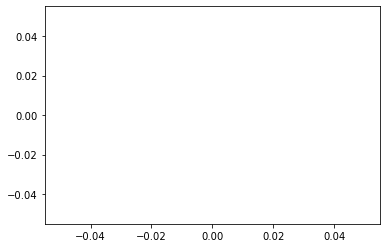

In [16]:
plt.plot(J_storage)

**CS4.** *Predict:* Write two functions `predict()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the straight line equation after standardization and adding of column for constant 1.

You can use the following function in your code:
- `np.where()`

In [17]:
def predict_norm(X, beta):
    p = log_regression(beta, X)
    return np.where(p>=0.5, 1, 0)
    pass

In [18]:
def predict(df_feature, beta):
    X = prepare_feature(df_feature)
    return predict_norm(X, beta)
    pass

In [23]:
pred = predict(df_test_features, beta)
print(pred.mean(), pred.std())

0.0 0.0


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


ValueError: x and y must be the same size

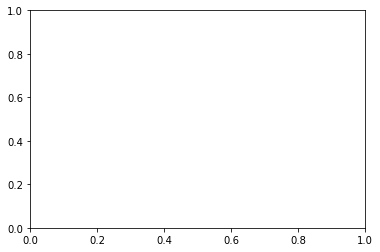

In [24]:
plt.scatter(df_feature, df_target)
plt.scatter(df_feature, pred)

**CS5.** *Multiple features and splitting of data set:* 

Do the following task in the code below:
- Read the following column names as the features: `"radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"`
- Read the column `diagnosis` as the target. Change the value from `M` and `B` to `1` and `0` respectively.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.
- Call `predict()` function on the test data set to get the predicted values.

In [ ]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]

# extract the features and the target columns
df_features, df_target = get_features_targets(df, )

# replace the target values using from string to integer 0 and 1
df_target = None

# split the data with random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# normalize the features
df_features_train_z = None

# change the feature columns to numpy array and append column of 1s
features = None

# change the target column to numpy array
target = None

iterations = 1500
alpha = 0.01

# provide initial guess for theta
beta = None

# call the gradient descent method
beta, J_storage = None, None

###
### YOUR CODE HERE
###
print(beta)



TypeError: get_features_targets() missing 2 required positional arguments: 'feature_names' and 'target_names'

In [ ]:
assert beta.shape == (8, 1)
ans = np.array([[-0.6139379 ], 
                [ 0.82529554],
                [ 0.72746485],
                [ 0.8236603 ],
                [ 0.81647937],
                [ 0.5057749 ],
                [ 0.44176466],
                [ 0.78736842]])
assert np.isclose(beta, ans).all()

AssertionError: 

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
plt.plot(J_storage)

In [ ]:
# call predict() to get the predicted values
pred = predict(df_features_test, beta)

###
### YOUR CODE HERE
###


In [ ]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

In [ ]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

In [ ]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)

**CS6.** *Confusion Matrix:* Write a function `confusion_matrix()` that takes in:
- `ytrue`: which is the true target values
- `ypred`: which is the predicted target values
- `labels`: which is a list of the category. In the above case it will be `[1, 0]`. Put the positive case as the first element of the list. 

The function should return a dictionary containing the matrix with the following format.

|                 | predicted positive (1) | predicted negative (0) |
|-----------------|--------------------|--------------------|
| actual positive (1) | correct positive  (1, 1) | false negative (1, 0)    |
| actual negative (0) | false positive (0, 1)   | correct negative (0, 0)   |

The keys to the dictionary are the indices: `(0, 0), (0, 1), (1, 0), (1, 1)`.

You can use the following function in your code:
- `itertools.product()`: this is to create a combination of all the labels. 

In [ ]:
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    ###
    ### YOUR CODE HERE
    ###
    return output


In [ ]:
result = confusion_matrix(df_target_test.values, pred, [1,0])
print(result)
assert result == {(0, 0): 100, (0, 1): 1, (1, 0): 12, (1, 1): 57}

**CS7.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `specificity`: total false positives / total negative cases
- `precision`: total  of correct positive cases / total predicted positive cases

In [ ]:
def calc_accuracy(cm):
    ###
    ### YOUR CODE HERE
    ###
    result = {'accuracy': accuracy, 'sensitivity': sensitivity,
              'specificity': specificity, 'precision': precision}
    return result


In [ ]:
ans = calc_accuracy(result)
expected = {'accuracy': 0.9235294117647059, 'sensitivity': 0.8260869565217391, 'specificity': 0.9900990099009901, 'precision': 0.9827586206896551}
assert np.isclose(ans['accuracy'], expected['accuracy'])
assert np.isclose(ans['sensitivity'], expected['sensitivity'])
assert np.isclose(ans['specificity'], expected['specificity'])
assert np.isclose(ans['precision'], expected['precision'])
 

**CS8.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]
# get the features and the columns
df_features = None

# replace target values with 0 and 1
df_target = None

###
### YOUR CODE HERE
###


In [ ]:
# split data set using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
feature = None

# change target to numpy array
target = None

###
### YOUR CODE HERE
###


In [ ]:
# create LogisticRegression object instance, use newton-cg solver
model = LogisticRegression(solver = 'newton-cg')

# build model
model.fit(df_features_train, target.flatten())
pass

# get predicted value
pred = model.predict(df_features_test)

###
### YOUR CODE HERE
###


In [ ]:
# calculate confusion matrix
cm = None

###
### YOUR CODE HERE
###


In [ ]:
expected = np.array([[58,  11], [6, 96]])
assert (cm == expected).all()

In [ ]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

In [ ]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

In [ ]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)